<a href="https://colab.research.google.com/github/andheartsjaz/Data-Science-Assignments-Thinkful/blob/master/LinearClassifier_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Classifiers
In this assignment you will load a dataset and train a Logistic regression Classifier.

### The Dataset
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 



### 1. Import necessary packages

For this exercise we need

 - pandas
 - train_test_split
 - LogisticRegression
 - pyplot from matplotlib

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# import numpy
import numpy as np

%matplotlib inline

### 2. Load and prepare the dataset


1.   Load the dataset into a dataframe named **df_data** (this step is done for you).
2.   Drop the name column. This column is not a feature required by the model.
3.   Create a dataframe named **X** containing all the columns except the status.
4.   Create a dataframe named **y** containing the status.



In [0]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis = 1)
y = df_data['status']

In [0]:
df_data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### 3. Split the dataset into a training set and a test set

In [0]:
# split here
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Create the model


1.   Instantiate a Logistic Regression classifier with a `lbfgs` solver and penalty set to 'none'.
2.   Fit the classifier to the data.

*If the algorithm fails to converge, what change can you make to fix that?*



In [0]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [0]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.755


### 6. L2 Regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.


In [0]:
# create model, fit and calculate score here
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000) # note: when we increased to 10000, from 1000, accuracy increased to 81%
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(lr_score))


Accuracy of Logistic Regression with L2 regularization: 0.816


### 7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

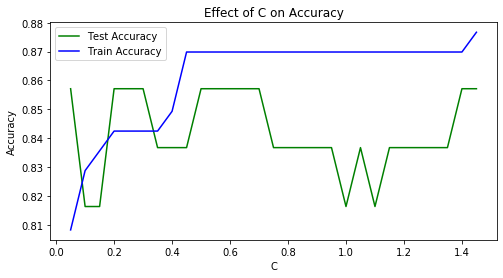

In [0]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

From the graph above the best value for C occur between 0.4 and 0.6, although we could also state this for the area occuring around 1.4. This/these regions minimize(s) the difference between the test and training accuracy implying the least amount of overfitting is occuring.